<a href="https://colab.research.google.com/github/natalie2103/CS103/blob/main/Email_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!pip install mailbox

  Preparing metadata (setup.py) ... done
  Created wheel for mailbox: filename=mailbox-0.4-py3-none-any.whl size=4684 sha256=95b8741efcdc35fd1de19482d18410b3ed988e2a9eae89a9b2114079c06c5ff2
  Stored in directory: /root/.cache/pip/wheels/7a/95/10/e0864f9d19ec7dcdf7eeedcb286ec19fc2556404a5e63e12de
Successfully built mailbox


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import mailbox
mboxfile = "gdrive/My Drive/Colab Notebooks/spamntrash.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [5]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
X-Mailgun-Sending-Ip
X-Mailgun-Sid
Received
Date
Mime-Version
Content-Type
Subject
From
To
X-Mailgun-Dkim
X-Mailgun-Native-Send
X-Mailgun-Track-Clicks
X-Mailgun-Track-Opens
Feedback-Id
X-Mailer
X-Report-Abuse-To
X-Mailgun-Variables
Message-Id


In [6]:
import csv

with open('mailbox.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])

  for message in mbox:
    writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [7]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [8]:
dfs.dtypes

,0
subject,object
from,object
date,object
to,object
label,object
thread,object


In [9]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [10]:
dfs = dfs[dfs['date'].notna()]

In [11]:
dfs.to_csv('gmail.csv')

In [12]:
dfs.info()


<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 1 to 911
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  748 non-null    object             
 1   from     911 non-null    object             
 2   date     911 non-null    datetime64[ns, UTC]
 3   to       905 non-null    object             
 4   label    911 non-null    object             
 5   thread   911 non-null    object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 49.8+ KB


In [13]:
dfs.head(10)

,subject,from,date,to,label,thread
1,OpenAI o1 Guide: How It Works & More,DataCamp Insights <team@datacamp.com>,2024-09-17 15:16:06+00:00,nataliejoy.loredo@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1810456817820445669
2,"This is your reminder: BER months na, may up t...",foodpanda <contact@info.foodpanda.ph>,2024-09-08 02:05:52+00:00,nataliejoy.loredo@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1809591727753084514
3,NaN,NATALIE JOY LOREDO <nataliejoy.loredo@students...,2024-09-06 07:58:47+00:00,Natalie Loredo <natalieloredo89@gmail.com>,"Archived,Sent",1809432164568795583
4,ISAT U VLE Notification You have submitted you...,"""Do not reply to this email (via ISAT U VLE)""...",2024-08-27 10:21:31+00:00,"""NATALIE JOY LOREDO"" <nataliejoy.loredo@studen...","Inbox,Category Personal,Unread",1808535746924355464
5,ISAT U VLE Notification You have upcoming acti...,"""ISAT U VLE Admin (via ISAT U VLE)"" <noreply@i...",2024-08-27 07:02:33+00:00,"""NATALIE JOY LOREDO"" <nataliejoy.loredo@studen...","Spam,Category Personal,Unread",1808523228821168824
6,Re:,Natalie Loredo <natalieloredo89@gmail.com>,2024-09-21 10:48:36+00:00,NATALIE JOY LOREDO <nataliejoy.loredo@students...,"Inbox,Important,Category Personal,Unread",1810802134409620184
7,NaN,Natalie Loredo <natalieloredo89@gmail.com>,2024-09-21 10:44:32+00:00,NATALIE JOY LOREDO <nataliejoy.loredo@students...,"Inbox,Important,Category Personal,Unread",1810802134409620184
8,We see winning awesome prizes in your future! ...,foodpanda <contact@info.foodpanda.ph>,2024-05-27 10:46:36+00:00,nataliejoy.loredo@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1800202405747177702
9,Ano tawag sa sirang can opener? Can't open! - ...,foodpanda <contact@info.foodpanda.ph>,2024-06-16 02:08:54+00:00,nataliejoy.loredo@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1801982883733439623
10,"Action needed: R Programming, Data Preparation...",The DataCamp Team <team@datacamp.com>,2024-05-07 01:30:15+00:00,nataliejoy.loredo@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1798355461977123348


In [14]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [15]:
import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [16]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [17]:
myemail = 'nataliejoy.loredo@students.isatu.edu.ph'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [18]:
dfs.drop(columns='to', inplace=True)

In [19]:
dfs.head(10)

,subject,from,date,label,thread
1,OpenAI o1 Guide: How It Works & More,team@datacamp.com,2024-09-17 15:16:06+00:00,inbox,1810456817820445669
2,"This is your reminder: BER months na, may up t...",contact@info.foodpanda.ph,2024-09-08 02:05:52+00:00,inbox,1809591727753084514
3,NaN,nataliejoy.loredo@students.isatu.edu.ph,2024-09-06 07:58:47+00:00,sent,1809432164568795583
4,ISAT U VLE Notification You have submitted you...,noreply@isatuvle.online,2024-08-27 10:21:31+00:00,inbox,1808535746924355464
5,ISAT U VLE Notification You have upcoming acti...,noreply@isatuvle.online,2024-08-27 07:02:33+00:00,inbox,1808523228821168824
6,Re:,natalieloredo89@gmail.com,2024-09-21 10:48:36+00:00,inbox,1810802134409620184
7,NaN,natalieloredo89@gmail.com,2024-09-21 10:44:32+00:00,inbox,1810802134409620184
8,We see winning awesome prizes in your future! ...,contact@info.foodpanda.ph,2024-05-27 10:46:36+00:00,inbox,1800202405747177702
9,Ano tawag sa sirang can opener? Can't open! - ...,contact@info.foodpanda.ph,2024-06-16 02:08:54+00:00,inbox,1801982883733439623
10,"Action needed: R Programming, Data Preparation...",team@datacamp.com,2024-05-07 01:30:15+00:00,inbox,1798355461977123348


In [20]:
import datetime
import pytz

def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [21]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [23]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name()) # Use day_name() to get the day of the week
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [24]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [25]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [26]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [27]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [28]:
dfs.index = dfs['date']
del dfs['date']

In [29]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Tue, 23 Aug 2022 09:52 PM
Wed, 25 Sep 2024 08:17 PM
label
inbox    736
sent     175
Name: count, dtype: int64


In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [31]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')

  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [32]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

<ipython-input-31-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-31-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

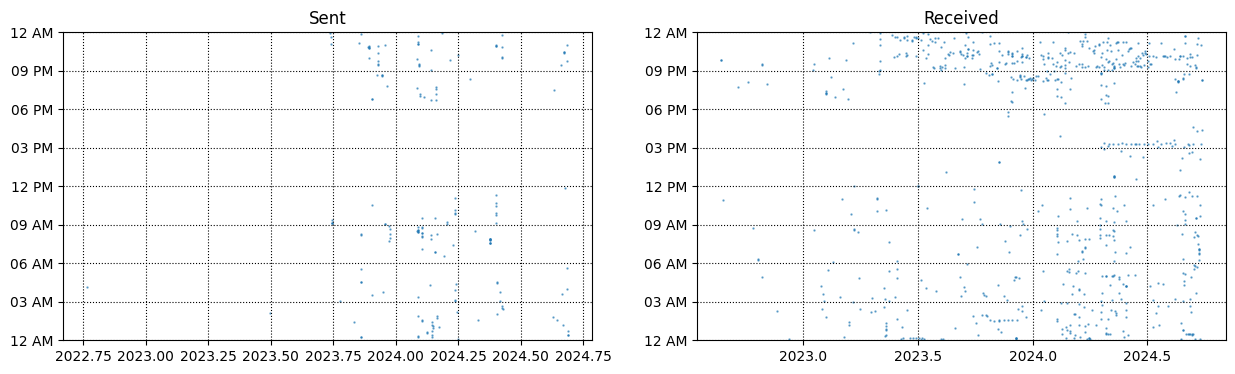

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [34]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [35]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [36]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

<ipython-input-31-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-35-fe9fa0c6dab1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-31-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-35-fe9fa0c6dab1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


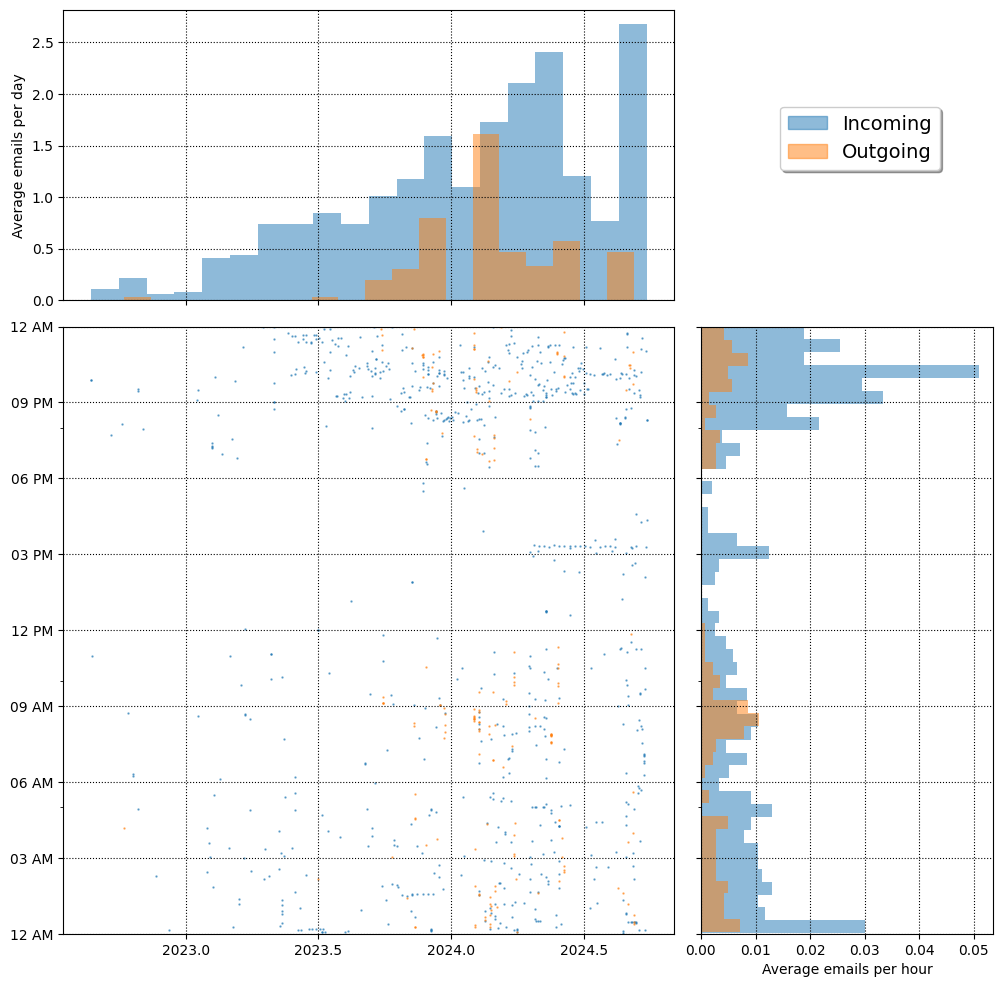

In [37]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

<Axes: xlabel='dayofweek'>

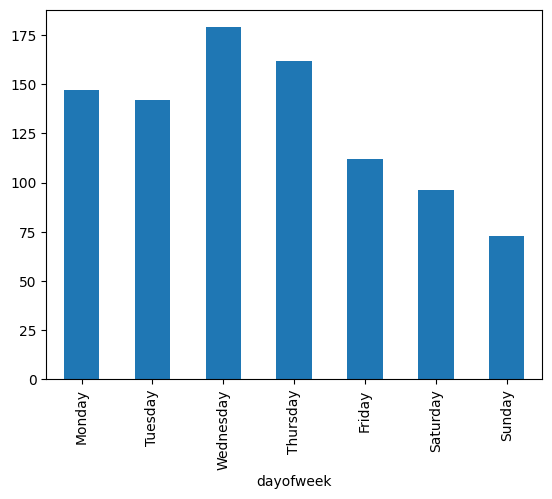

In [38]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [39]:
addrs = received['from'].value_counts()

addrs[0:4]

,count
from,
contact@info.foodpanda.ph,179
notification@service.tiktok.com,112
team@datacamp.com,75
no-reply@accounts.google.com,75


<ipython-input-31-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-35-fe9fa0c6dab1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
<ipython-input-31-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-35-fe9fa0c6dab1>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


ValueError: `bins` must be positive, when an integer

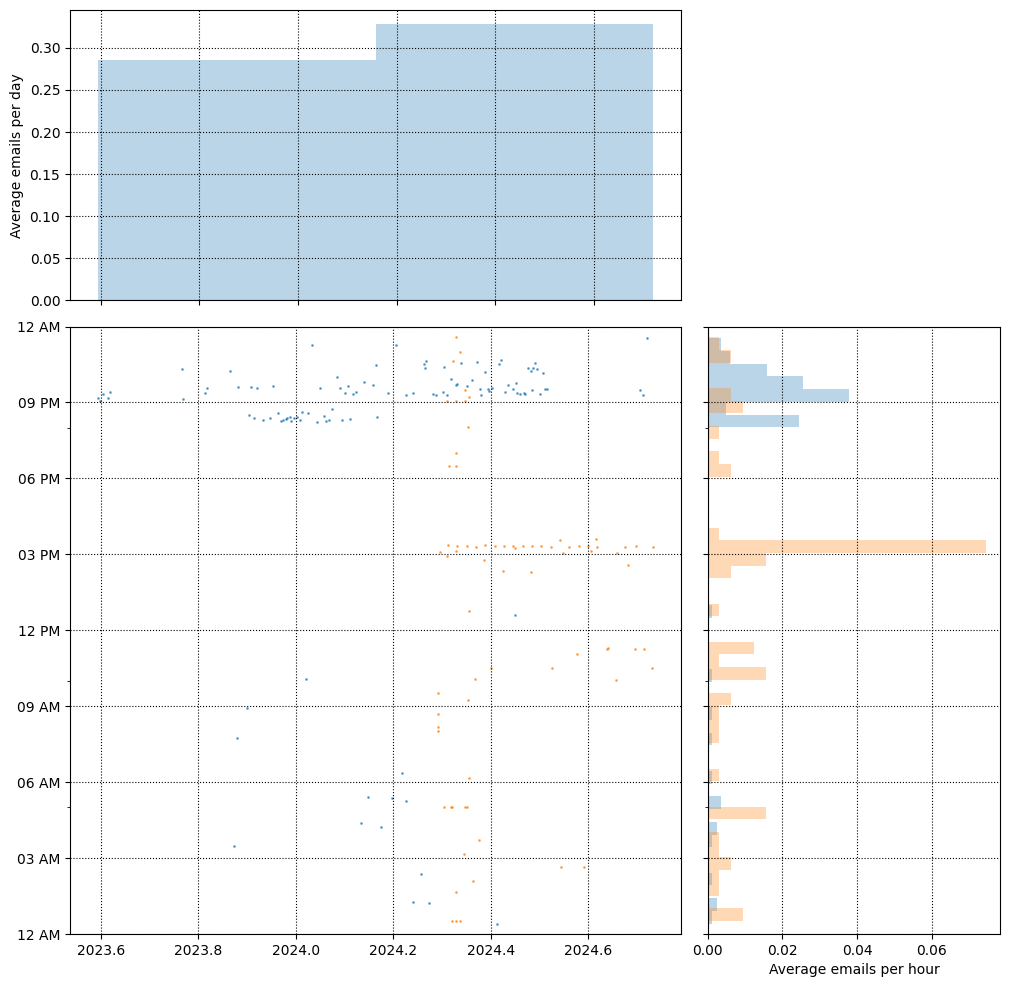

In [51]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
    labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

<ipython-input-52-c5abe68ebf9d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdw = sent.groupby('dayofweek').size() / len(sent)
<ipython-input-52-c5abe68ebf9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rdw = received.groupby('dayofweek').size() / len(received)


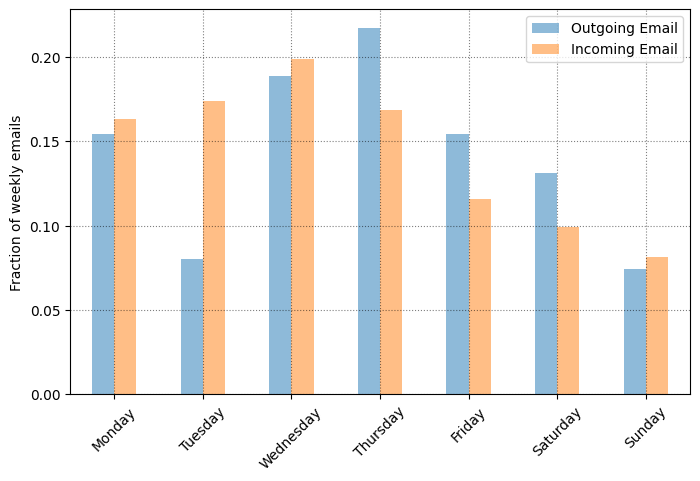

In [52]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

<ipython-input-35-fe9fa0c6dab1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


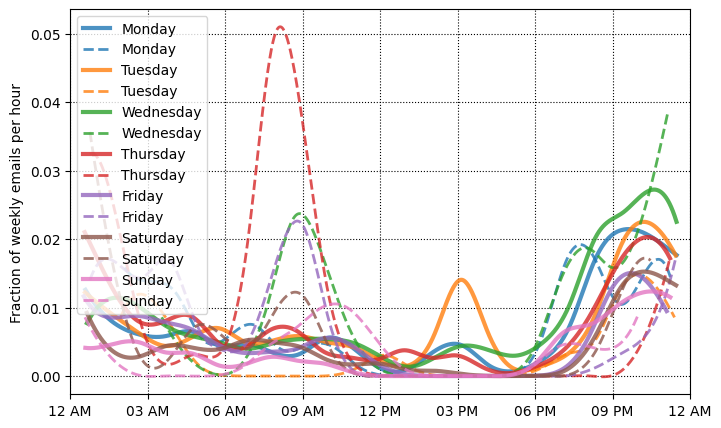

In [53]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')


In [54]:
from wordcloud import WordCloud

df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

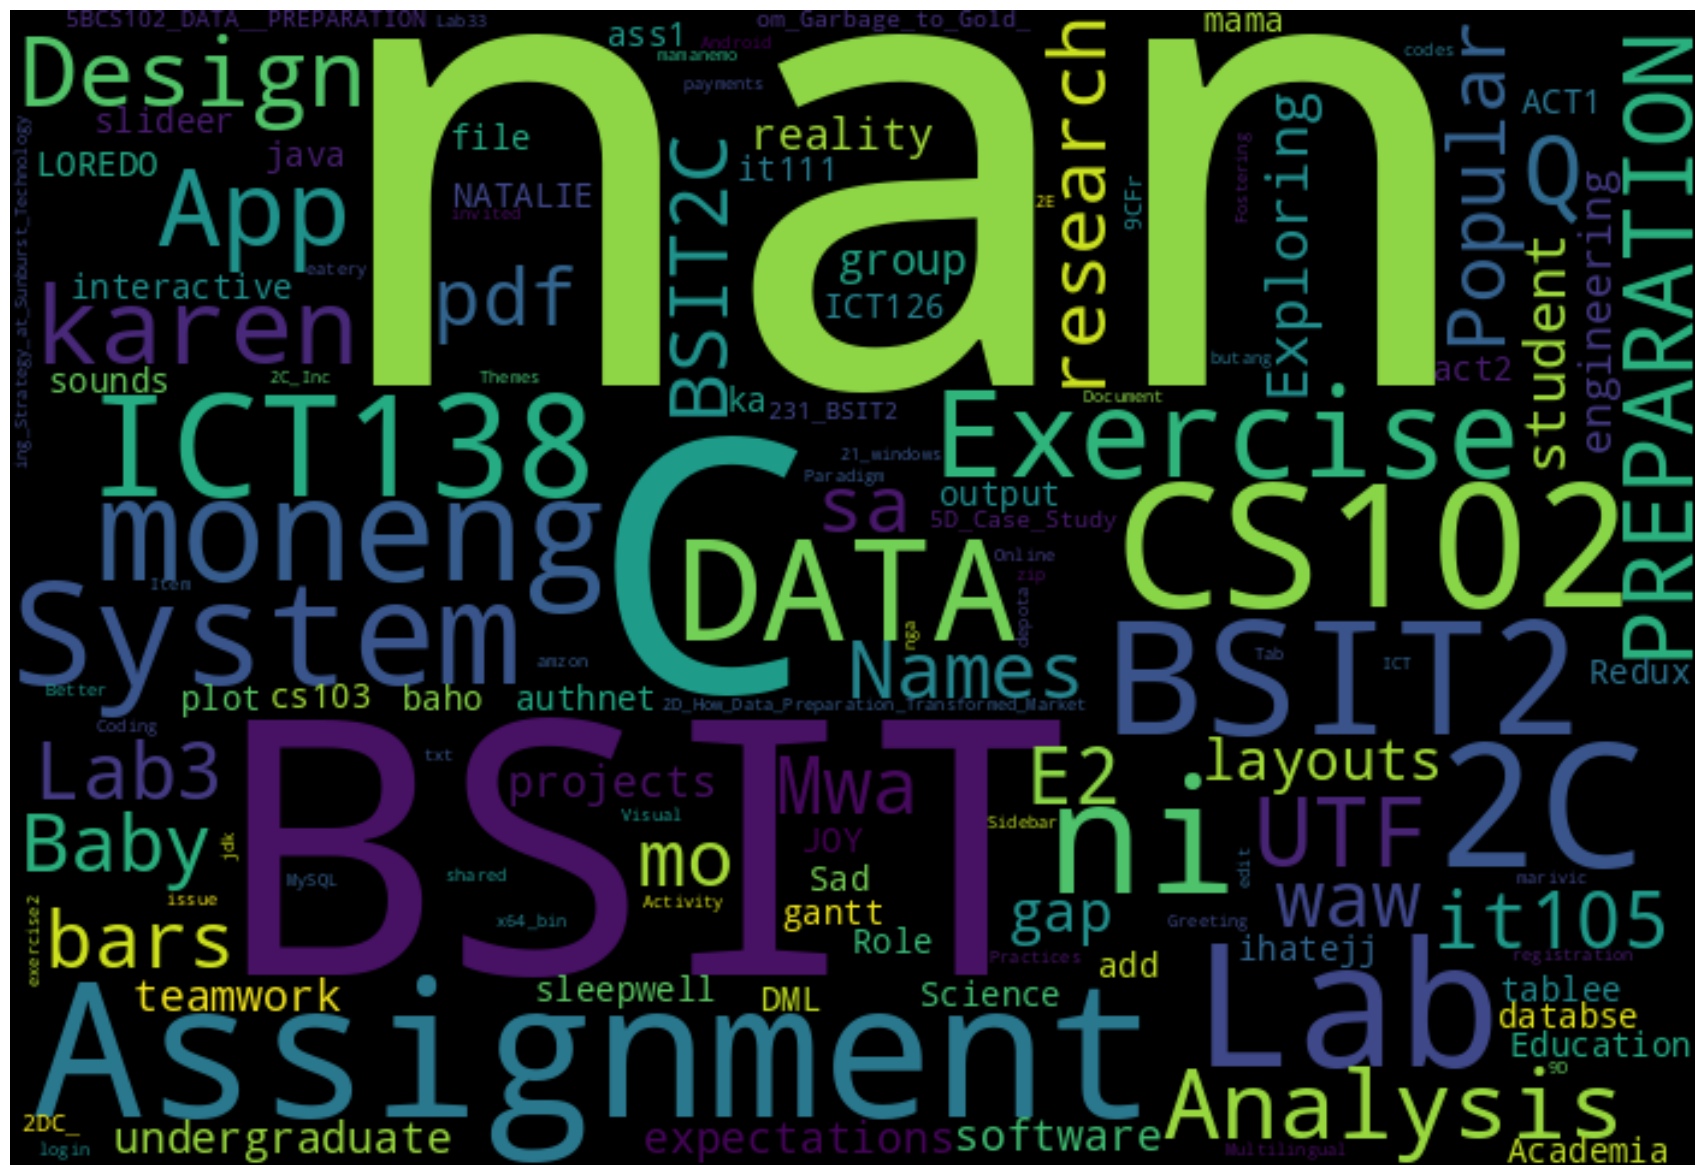

In [55]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)